In [165]:
import numpy as np
import pandas as pd
import ggplot as gp
from ggplot import *
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
wine_df = pd.read_csv(url, header = None, names = ["Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total_phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"])

In [166]:
wine_df.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [167]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 1 to 3
Data columns (total 13 columns):
Alcohol                         178 non-null float64
Malic acid                      178 non-null float64
Ash                             178 non-null float64
Alcalinity of ash               178 non-null float64
Magnesium                       178 non-null int64
Total_phenols                   178 non-null float64
Flavanoids                      178 non-null float64
Nonflavanoid phenols            178 non-null float64
Proanthocyanins                 178 non-null float64
Color intensity                 178 non-null float64
Hue                             178 non-null float64
OD280/OD315 of diluted wines    178 non-null float64
Proline                         178 non-null int64
dtypes: float64(11), int64(2)
memory usage: 19.5 KB


In [168]:
wine_df.corr()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity of ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
Color intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


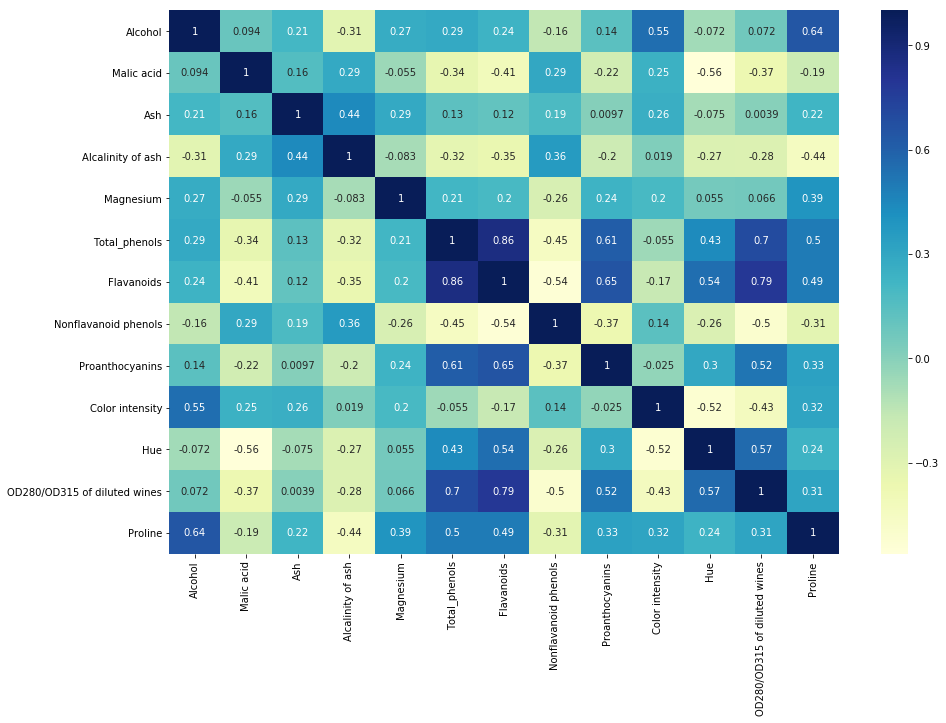

In [169]:
plt.subplots(figsize=(15,10))
sns.heatmap(wine_df.corr(), xticklabels=wine_df.columns.values, yticklabels=wine_df.columns.values, annot=True, cmap="YlGnBu")
plt.show()

In [170]:
wine_df['Alcohol (Scaled)'] = round(wine_df['Alcohol'],0).astype(str).str.zfill(4)
wine_df['Color (Scaled)'] = round(wine_df['Color intensity'],0).astype(str).str.zfill(4)
wine_df['Hue (Scaled)'] = round(wine_df['Hue'],0).astype(str).str.zfill(4)
wine_df['Ash (Scaled)'] = round(wine_df['Ash'],0).astype(str).str.zfill(4)

In [171]:
wine_df.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Alcohol (Scaled),Color (Scaled),Hue (Scaled),Ash (Scaled)
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,14.0,06.0,01.0,02.0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,13.0,04.0,01.0,02.0
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,13.0,06.0,01.0,03.0
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,14.0,08.0,01.0,02.0
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,13.0,04.0,01.0,03.0


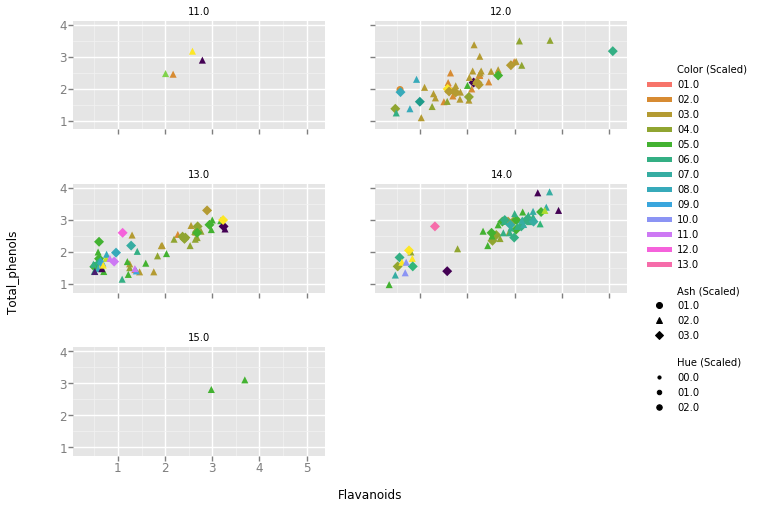

<ggplot: (307661404)>

In [172]:
p = ggplot(wine_df, aes(x='Flavanoids',y='Total_phenols',color='Color (Scaled)',size='Hue (Scaled)',shape='Ash (Scaled)'))
p + geom_point(size=50) + \
    facet_wrap("Alcohol (Scaled)")

In [173]:
train, test = train_test_split(wine_df, test_size=0.2)

In [174]:
len(train)

142

In [175]:
len(test)

36

In [176]:
train_regression = smf.ols('Flavanoids ~ Total_phenols', data=train).fit()
print(train_regression.summary())

                            OLS Regression Results                            
Dep. Variable:             Flavanoids   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     462.1
Date:                Thu, 25 Jan 2018   Prob (F-statistic):           3.45e-46
Time:                        23:38:00   Log-Likelihood:                -95.378
No. Observations:                 142   AIC:                             194.8
Df Residuals:                     140   BIC:                             200.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.1944      0.155     -7.730

In [177]:
test_regression = smf.ols('Flavanoids ~ Total_phenols', data=test).fit()
print(test_regression.summary())

                            OLS Regression Results                            
Dep. Variable:             Flavanoids   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     80.57
Date:                Thu, 25 Jan 2018   Prob (F-statistic):           1.72e-10
Time:                        23:38:00   Log-Likelihood:                -30.846
No. Observations:                  36   AIC:                             65.69
Df Residuals:                      34   BIC:                             68.86
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.0937      0.368     -2.972

In [178]:
full_regression = smf.ols('Flavanoids ~ Total_phenols', data=wine_df).fit()
print(full_regression.summary())

                            OLS Regression Results                            
Dep. Variable:             Flavanoids   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     520.9
Date:                Thu, 25 Jan 2018   Prob (F-statistic):           1.76e-54
Time:                        23:38:00   Log-Likelihood:                -129.38
No. Observations:                 178   AIC:                             262.8
Df Residuals:                     176   BIC:                             269.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.1376      0.144     -7.912

### Discussion Topics

* What issues came up with doing faceted plotting in ggplot?
  
  Some of the issues that came up w/ faceted plotting in ggplot, included not being able to leverage float values
  for faceting, and the inability to sort string-converted integers effectively w/out padding the strings with leading
  zeros.  These were by no means show-stoppers in leveraging the functionality, but required additional columns to be
  added to the data frame I was leveraging, and some additional manipulation to allow for proper sorting.


* Why does clustering fit well with faceted plotting?
  
  Clustering fits well with facted plotting, as the facet strategy essentially creates clusters automatically, w/out
  having to leverage any advanced algorithmic approach.  It is a great EDA strategy, and allows for the ability to
  pivot quickly.
  

* What did you discover using a correlation heatmap on your dataset?

  What was interesting about leveraging a correlation heatmap, is that was not only aesthetically pleasing, but it
  was much easier to identify correlations between variables that were subsequently used in additional visualizations.


* What conclusions can be made from the experimentations on test and training Data?

  When using a linear regression model against the training data, the statistical measure of how close the data are to
  the fitted regression line (Adj. R-Squared) was much higher when compared to the Adj. R-Squared of the test model.
  The Adj. R-Squared value for the training model was actually closer to the Adj. R-Squared value returned when
  running the model against the full data set, which helps validate the central limit theorem . . . as sample size
  increases, the sum/average of a sufficiently large number of independent random variables of the sample means will
  approach the mean of the population, or a normal distribution.  Given the smaller sample size for the test data,
  this sample was not normally distribvuted, or an accurate representation of the population, but repeated samples
  should yield a result that is very close to that of the full population, which is what we were able to demonstrate.